<a href="https://colab.research.google.com/github/AjayKumarGogineni777/Smart-Contract-analysis-using-AWD-LSTM/blob/master/Smart_Contracts_AWD_LSTM_Classification_multiclass_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fastai
from fastai.callbacks import *

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/gdrive/My Drive/SC Security Clean/clean_train.csv')
data.head()

,ADDRESS,OPCODE,CATEGORY
0,0x219f4ee903f78e78773e5d1e3520cfd507485bc6,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0
1,0x560ed796aa8d23411b94b9d047ecdda39d4fcdeb,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0
2,0xe726f97ff3c63dd71c1520c102adc39d1a2693ea,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0
3,0x8ebac490495958b3804bb079e259340f0f53b69c,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0
4,0x190700d69031db6b072a30577f9b3dbc53a320a1,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0


In [ ]:
len(data)

892913

In [ ]:
data.nunique()

ADDRESS     892913
OPCODE       34805
CATEGORY         5
dtype: int64

In [ ]:
#Select the way how you want to store the output, could be pd.DataFrame or Dict, I will use Dict to demonstrate:
col_uni_val={}
data2 = data['CATEGORY']
for i in data.columns:
    col_uni_val[i] = len(data[i].unique())

#Import pprint to display dic nicely:
import pprint
pprint.pprint(col_uni_val)

{'ADDRESS': 892913, 'CATEGORY': 5, 'OPCODE': 34805}


In [ ]:
df = data.groupby('CATEGORY')['ADDRESS'].nunique()
df.head()

CATEGORY
0 0 0 1      5801
0 0 1 0      1461
0 1 0 0      1207
0 1 1 0       171
1 0 0 0    884273
Name: ADDRESS, dtype: int64

In [ ]:
df2 = data.groupby('CATEGORY')['OPCODE'].nunique()
df2.head()

CATEGORY
0 0 0 1     1770
0 0 1 0      370
0 1 0 0      145
0 1 1 0      129
1 0 0 0    32408
Name: OPCODE, dtype: int64

In [ ]:
### multi class
df = data
df_a = df.loc[df['CATEGORY'] == '1 0 0 0']
df_a2 = df_a.drop('ADDRESS', 1)
#df_a.head()
df_b = df.loc[df['CATEGORY'] == '0 0 0 1']
df_b2 = df_b.drop('ADDRESS', 1)

df_c = df.loc[df['CATEGORY'] == '0 0 1 0']
df_c2 = df_c.drop('ADDRESS', 1)
#df_c.head()

df_d = df.loc[df['CATEGORY'] == '0 1 0 0']
df_d2 = df_d.drop('ADDRESS', 1)
#df_d.head()

#df_e = df.loc[df['CATEGORY'] == '0 1 1 0']
#df_e2 = df_e.drop('ADDRESS', 1)

#df_e.head()


In [ ]:
k1 = df_a.OPCODE.unique()
k1 = pd.DataFrame({'OPCODE' : k1 , 'CATEGORY' : '1 0 0 0'})
k1.head() 

,OPCODE,CATEGORY
0,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0
1,60 60 52 36 15 61 57 63 7c 60 35 04 16 63 81 1...,1 0 0 0
2,36 60 80 37 60 60 36 60 73 60 5a 03 f4 15 60 5...,1 0 0 0
3,60 60 52 5b fe 00 a1 65 20 65 0a 41 82 86 95 5...,1 0 0 0
4,60 60 52 36 15 61 57 63 60 60 0a 60 35 04 16 6...,1 0 0 0


In [ ]:
k2 = df_b.OPCODE.unique()
k2 = pd.DataFrame({'OPCODE' : k2 , 'CATEGORY' : '0 0 0 1'})

k3 = df_c.OPCODE.unique()
k3 = pd.DataFrame({'OPCODE' : k3 , 'CATEGORY' : '0 0 0 1'})

k4 = df_b.OPCODE.unique()
k4 = pd.DataFrame({'OPCODE' : k4 , 'CATEGORY' : '0 0 0 1'})

k5 = df_c.OPCODE.unique()
k5 = pd.DataFrame({'OPCODE' : k5 , 'CATEGORY' : '0 0 0 1'})

In [ ]:
### binary 
k1_train = k1[0:15000]
k1_test = k1[15000:20000]

k2_train = k2[0:1500]
k2_test = k2[1500:]

k3_train = k3[0:330]
k3_test = k3[330:]

k4_train = k4[0:120]
k4_test = k4[120:]

k5_train = k5[0:100]
k5_test = k5[100:]

In [ ]:
## multi class
k1_train = k1[0:27408]
#k1_test = k1[27408:]
k1_test = k1[27408:-140]

In [ ]:
len(k1_test)

4860

In [ ]:
b_train = df_b2[0:4931]
b_test = df_b2[4931:]
c_train = df_c2[0:1241]
c_test = df_c2[1241:]
d_train = df_d2[0:1026]
d_test = df_d2[1026:]
len(k1),len(df_b2), len(df_c2), len(df_d2)

(32408, 5801, 1461, 1207)

In [ ]:
b_unique = list(df_b2['OPCODE'].tolist())
c_unique = list(df_c2['OPCODE'].tolist())
d_unique = list(df_d2['OPCODE'].tolist())
b_dict = {}; b_cnt = []
c_dict = {}; c_cnt = []
d_dict = {}; d_cnt = []
for item in b_unique:
  if item not in b_dict.keys():
    b_dict[item] = 1
  else:
    b_dict[item] += 1
for item in c_unique:
  if item not in c_dict.keys():
    c_dict[item] = 1
  else:
    c_dict[item] += 1
for item in d_unique:
  if item not in d_dict.keys():
    d_dict[item] = 1
  else:
    d_dict[item] += 1

In [ ]:
for key in b_dict:
  b_cnt.append(b_dict[key])
for key in c_dict:
  c_cnt.append(c_dict[key])
for key in d_dict:
  d_cnt.append(d_dict[key])

In [ ]:
171*0.15, len(b_cnt)

(25.65, 1770)

In [ ]:
def get_df(lis, dict1, cat):
  train = []; train_cat= []
  valid = []; valid_cat = []
  test = []; test_cat = []
  for i in range(int(0.7*len(lis))):
    train_cat.append(cat)
    if lis[i]>10:
      for j in range(10):
        train.append(dict1[list(dict1.keys())[i]])
    else:
      for j in range(lis[i]):
        train.append(dict1[list(dict1.keys())[i]])
  for i in range(int(0.7*len(lis)), int(0.85*len(lis))):
    valid_cat.append(cat)
    if lis[i]>10:
      for j in range(10):
        valid.append(dict1[list(dict1.keys())[i]])
    else:
      for j in range(lis[i]):
        valid.append(dict1[list(dict1.keys())[i]])
  for i in range(int(0.85*len(lis)), len(lis)):
    test_cat.append(cat)
    if lis[i]>10:
      for j in range(10):
        test.append(dict1[list(dict1.keys())[i]])
    else:
      for j in range(lis[i]):
        test.append(dict1[list(dict1.keys())[i]])
  train_df = pd.DataFrame(list(zip(train, train_cat)),
                          columns = ['OPCODE', 'CATEGORY'])
  valid_df = pd.DataFrame(list(zip(valid, valid_cat)),
                          columns = ['OPCODE', 'CATEGORY'])
  test_df = pd.DataFrame(list(zip(test, test_cat)),
                          columns = ['OPCODE', 'CATEGORY'])
  return train_df, valid_df, test_df
b_tr, b_va, b_te = get_df(b_cnt, b_dict, cat = '0 0 0 1')
c_tr, c_va, c_te = get_df(c_cnt, c_dict, cat = '0 0 1 0')
d_tr, d_va, d_te = get_df(d_cnt, d_dict, cat = '0 1 0 0')

In [ ]:
print(len(b_tr), len(b_va), len(b_te))
print(len(c_tr), len(c_va), len(c_te))
print(len(d_tr), len(d_va), len(d_te))

1239 265 266
259 55 56
101 22 22


In [ ]:
32408*0.85

27546.8

In [ ]:
## multi class
k1_train = k1[0:22685]
k1_valid = k1[22685:27546]
k1_test = k1[27546:]
k1_train.head()

In [ ]:
train = pd.concat([k1_train, b_tr, c_tr, d_tr])
print(len(train))
valid = pd.concat([k1_valid, b_va, c_va, d_va])
print(len(valid))
test = pd.concat([k1_test, b_te, c_te, d_te])
print(len(test))

24284
5203
4862


In [ ]:
targets = []
t1 = [3 for i in range(len(k1_test)-1)]
t2 = [0 for i in range(len(b_test)-1)]
t3 = [1 for i in range(len(c_test)-1)]
t4 = [2 for i in range(len(d_test)-1)]

In [ ]:
# train.to_csv('/content/gdrive/My Drive/DCNN/Smart Contracts/train_final.csv')


In [ ]:
# test.to_csv('/content/gdrive/My Drive/DCNN/Smart Contracts/test_final_2.csv')

In [ ]:
df_row_merged = pd.concat([k1, df_b2, df_c2, df_d2])
df_row_merged.head()

,OPCODE,CATEGORY
0,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0
1,60 60 52 36 15 61 57 63 7c 60 35 04 16 63 81 1...,1 0 0 0
2,36 60 80 37 60 60 36 60 73 60 5a 03 f4 15 60 5...,1 0 0 0
3,60 60 52 5b fe 00 a1 65 20 65 0a 41 82 86 95 5...,1 0 0 0
4,60 60 52 36 15 61 57 63 60 60 0a 60 35 04 16 6...,1 0 0 0


In [ ]:
########### MAIN CODE

import pandas as pd
import numpy as np
df_row_merged = pd.read_csv('/content/gdrive/My Drive/DCNN/Smart Contracts/train_final.csv')
df_row_merged.head()
df = df_row_merged


In [ ]:
len(df_row_merged)

34606

In [ ]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from fastai.text import *
from nltk import tokenize

In [ ]:
# Create databunch

df = df_row_merged
data = (TextList.from_df(df, cols='OPCODE')
                .split_by_rand_pct(0.2)
                .label_for_lm()
                .databunch(bs=48))
data.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,61 57 7f 60 60 90 54 90 61 0a 90 04 73 16 60 51 80 82 73 16 73 16 81 52 60 01 91 50 50 60 51 80 91 03 90 a1 61 56 5b 60 60 fd 5b 5b 56 5b 00 5b 34 15 61 57 fe 5b 61 60 80 80 35 73 16 90 60 01 90 91 90 50 50 61
1,61 0a 90 04 73 16 73 16 33 73 16 14 80 61 57 50 60 60 90 54 90 61 0a 90 04 73 16 73 16 33 73 16 14 5b 15 15 61 57 60 80 fd 5b 81 60 80 61 0a 81 54 81 73 02 19 16 90 83 73 16 02 17 90 55 50 80 60 60 61 0a 81 54
2,92 91 83 01 82 82 80 15 61 57 80 60 10 61 57 61 80 83 54 04 02 83 52 91 60 01 91 61 56 5b 82 01 91 90 60 52 60 60 20 90 5b 81 54 81 52 90 60 01 90 60 01 80 83 11 61 57 82 90 03 60 16 82 01 91 5b xxwrep 5 50 81 56
3,90 81 52 60 01 60 51 80 91 03 90 a3 50 60 5b 92 91 50 50 56 5b 60 54 81 56 5b 60 60 60 0a 03 80 84 16 60 90 81 52 60 81 81 52 60 80 83 20 33 85 16 84 52 82 52 80 83 20 54 93 86 16 83 52 60 90 91 52 81 20 54 90
4,61 56 5b 60 34 11 15 61 57 61 56 5b 60 60 60 0a 03 84 81 16 60 90 81 52 60 60 90 81 52 60 80 83 20 33 90 94 16 83 52 92 90 52 20 54 82 11 15 61 57 50 60 61 56 5b 60 60 60 0a 03 84 81 16 60 90 81 52 60 60 90 81


In [ ]:
data_lm = data
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


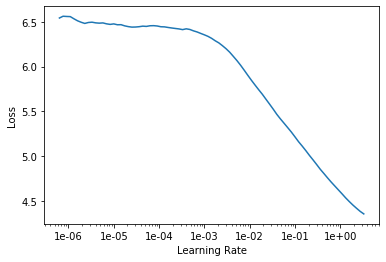

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.150070,0.944705,0.744644,23:35


In [ ]:
path_models1 = '/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/encoder/'


In [ ]:
learn.save_encoder(path_models1 + 'initial_enc-1-epochs-complete')

In [ ]:
learn.save(path_models1 + 'fit_head')

In [ ]:
learn.load(path_models1 + 'fit_head');

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(3, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.209170,1.034891,0.729575,18:42
1,1.188855,0.965753,0.742357,18:42
2,1.183764,0.906401,0.756119,18:43


In [ ]:
learn.save(path_models1 + 'fit_head_2')

In [ ]:
learn.save_encoder(path_models1 + 'initial_enc-4-epochs-1e-3-complete-2')

In [ ]:
learn.fit_one_cycle(3, 7e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.370107,1.062524,0.718436,18:44
1,1.190393,0.980381,0.739281,18:43
2,1.152859,0.901615,0.757573,18:41


In [ ]:
learn.save(path_models1 + 'fine_tuned-ver-2')
learn.save_encoder(path_models1 + 'initial_enc-7-epochs-1e-3-complete-2')

In [ ]:
learn.load_encoder(path_models1 + 'initial_enc-5-epochs-1e-3-complete-2');

In [ ]:
learn.load(path_models1 + 'fine_tuned-ver-2');

In [ ]:
learn.fit_one_cycle(2, 3e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.099067,0.952350,0.746386,18:43
1,1.167776,0.891738,0.760354,18:43


In [ ]:
learn.save(path_models1 + 'fine_tuned-final')
learn.save_encoder(path_models1 + 'initial_enc-9-epochs-3e-2-complete-2')

In [ ]:
# ############# Classifier
# ###########  Main code for classifier data

# bs = 32

# data_lm = data
# csv_path = '/content/gdrive/My Drive/DCNN/Smart Contracts/'
# classifier_data = (TextList.from_df(df, csv_path, cols=['OPCODE','CATEGORY'], vocab=data_lm.vocab)
#                     .split_by_rand_pct(0.15, seed = 42)
#                     .label_from_df(cols='CATEGORY', label_delim='|')
#                     .databunch(bs=bs))
# path_models = '/content/gdrive/My Drive/Smart Contracts/models/Smart_Contracts'

# test_df = pd.read_csv('/content/gdrive/My Drive/DCNN/Smart Contracts/test_final_2.csv')
# classifier_data.add_test(test_df['OPCODE'])

In [ ]:
############# Classifier
###########  Main code for classifier data

bs = 32

data_lm = data
csv_path = '/content/gdrive/My Drive/DCNN/Smart Contracts/'
classifier_data = (TextList.from_df(train_df = train, valid_df = valid,
                                    #cols=['OPCODE','CATEGORY'],
                                    vocab=data_lm.vocab)
                    #.split_by_rand_pct(0.15, seed = 42)
                    .label_from_df(cols='CATEGORY', label_delim='|')
                    .databunch(bs=bs))
path_models = '/content/gdrive/My Drive/Smart Contracts/models/Smart_Contracts'

test_df = test#pd.read_csv('/content/gdrive/My Drive/DCNN/Smart Contracts/test_final_2.csv')
classifier_data.add_test(test_df['OPCODE'])

In [ ]:
learner = text_classifier_learner(classifier_data, AWD_LSTM, drop_mult=1.0, metrics=fbeta)

In [ ]:
path_models1 = '/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/encoder/'
learner.load_encoder(path_models1 + 'initial_enc-9-epochs-3e-2-complete-2');
learner.freeze()

epoch,train_loss,valid_loss,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


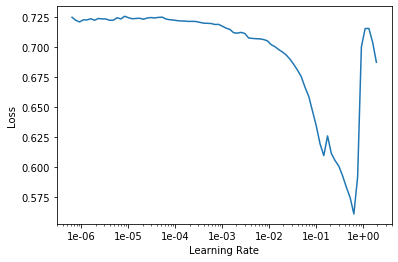

In [ ]:
## Learning Rate Scheduler for Classifier
learner.lr_find()
learner.recorder.plot()

In [ ]:
lr = 6e-2
learner.fit_one_cycle(2,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )

epoch,train_loss,valid_loss,fbeta,time
0,0.200910,29.579208,0.911231,23:08
1,0.158925,1.395412,0.954207,22:26


In [ ]:
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-2-epochs-8e-2')

In [ ]:
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-2-epochs-8e-2');

In [ ]:
learner.freeze_to(-2)
lr = 5e-2
learner.fit_one_cycle(6,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )

epoch,train_loss,valid_loss,fbeta,time
0,0.168052,0.148936,0.947752,26:12
1,0.198472,2.447259,0.916079,22:07
2,0.177667,0.197151,0.957386,20:57
3,0.148902,0.366099,0.951807,23:36
4,0.109622,0.257642,0.957648,22:16
5,0.094885,0.290410,0.960629,26:18


In [ ]:
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-8-epochs-3e-2')

In [ ]:
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-8-epochs-3e-2');

In [ ]:
learner.freeze_to(-2)
lr = 2e-2
learner.fit_one_cycle(3,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )

epoch,train_loss,valid_loss,fbeta,time
0,0.165682,0.160569,0.950083,41:02
1,0.152415,0.120780,0.952477,39:56
2,0.136795,0.162884,0.949977,47:57


In [ ]:
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-11-epochs-2e-2');

In [ ]:
learner.freeze_to(-2)
lr = 4e-2
learner.fit_one_cycle(8,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )

epoch,train_loss,valid_loss,fbeta,time
0,0.131081,0.234887,0.952179,42:31
1,0.175745,0.505492,0.954780,50:47
2,0.143650,0.237026,0.947215,47:46
3,0.151252,0.472699,0.947165,47:20
4,0.138624,0.086501,0.953656,51:14
5,0.144528,12.592117,0.946307,43:49
6,0.122632,0.306239,0.949780,41:40
7,0.125533,0.253642,0.951574,47:21


In [ ]:
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier3/classifier-19-epochs-4e-2');

In [ ]:
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier3/classifier-19-epochs-4e-2');
learner.freeze_to(-2)
lr = 9e-3
learner.fit_one_cycle(8,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-27-epochs-9e-3')

epoch,train_loss,valid_loss,fbeta,time
0,0.115678,0.200073,0.949316,40:42
1,0.119503,0.132708,0.951138,39:34
2,0.124392,8.338257,0.946387,47:40
3,0.109703,0.304525,0.952657,42:14
4,0.124057,0.106317,0.953597,50:31
5,0.097536,0.086474,0.959863,47:41
6,0.108899,0.078886,0.961024,47:02
7,0.098650,0.082841,0.960359,51:00


In [ ]:
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-27-epochs-9e-3');

In [ ]:
learner.freeze_to(-2)
lr = 1e-2
learner.fit_one_cycle(5,slice(lr/(2.6**4),lr), moms=(0.8,0.7))
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-32-epochs-5e-2')

epoch,train_loss,valid_loss,fbeta,time


In [ ]:
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-32-epochs-5e-2');
learner.freeze_to(-3)
lr = 1e-2
learner.fit_one_cycle(10,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-42-epochs-5e-2')

epoch,train_loss,valid_loss,fbeta,time
0,0.177238,0.148695,0.960302,12:29
1,0.177051,0.139857,0.962692,11:11
2,0.161684,0.135425,0.964918,13:02
3,0.174451,0.124701,0.968068,12:41
4,0.155101,0.135842,0.961334,11:57
5,0.153178,0.132065,0.965081,13:15
6,0.154783,0.121194,0.966601,13:46
7,0.155945,0.118097,0.967525,11:50
8,0.133530,0.120655,0.966873,11:42
9,0.150391,0.121996,0.967036,11:04


In [ ]:
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-42-epochs-5e-2');
lr = 2e-2
learner.fit_one_cycle(10,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/binary/classifier-52-epochs-2e-2');

epoch,train_loss,valid_loss,fbeta,time
0,0.284021,0.206427,0.945856,12:28
1,0.260642,0.185148,0.951015,11:11
2,0.256787,0.180328,0.954600,13:04
3,0.254561,0.188082,0.953622,12:41
4,0.231221,0.183670,0.950798,11:55
5,0.236342,0.182349,0.950201,13:10
6,0.235094,0.192659,0.945259,13:41
7,0.237727,0.202812,0.943901,11:48
8,0.211422,0.211175,0.942761,11:41
9,0.231958,0.197932,0.946834,11:05


In [ ]:
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-52-epochs-2e-2');
lr = 9e-3
learner.freeze_to(-2)
learner.fit_one_cycle(6,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )

epoch,train_loss,valid_loss,fbeta,time
0,0.091840,0.081329,0.959927,40:09
1,0.091362,0.073666,0.962832,39:01
2,0.088721,10.377362,0.966533,46:59
3,0.077053,0.710052,0.948169,41:37
4,0.085262,0.127197,0.968278,49:46
5,0.070708,7.465377,0.957037,46:59


In [ ]:
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-58-epochs-9e-3')

In [ ]:
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-58-epochs-9e-3');
lr = 2e-2
learner.freeze_to(-2)
learner.fit_one_cycle(6,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-64-epochs-2e-2')

epoch,train_loss,valid_loss,fbeta,time
0,0.122599,2.425085,0.959157,28:02
1,0.127436,0.210676,0.954399,25:09
2,0.147553,2.075237,0.949922,23:46
3,0.128009,0.094653,0.951353,25:22
4,0.097732,0.086951,0.959326,24:45
5,0.100622,0.084934,0.959171,24:46


In [ ]:
lr = 3e-2
learner.freeze_to(-2)
learner.fit_one_cycle(6,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-70-epochs-2e-2')

epoch,train_loss,valid_loss,fbeta,time
0,0.127717,0.108689,0.957579,25:41
1,0.155365,0.178721,0.955620,27:50
2,0.153534,0.187778,0.956547,23:46
3,0.129661,0.128513,0.955822,22:40
4,0.146330,0.402595,0.960129,25:41
5,0.114459,0.530509,0.960680,24:11


In [ ]:
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-70-epochs-2e-2');
lr = 3e-2
learner.freeze_to(-2)
learner.fit_one_cycle(6,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-76-epochs-2e-2')

epoch,train_loss,valid_loss,fbeta,time
0,0.096420,0.117154,0.964946,29:57
1,0.122123,0.283136,0.961237,29:03
2,0.109439,0.114839,0.967295,34:47
3,0.093851,0.680065,0.964561,30:51
4,0.091518,0.332350,0.970309,36:51
5,0.071435,0.821643,0.968985,34:48


In [ ]:
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-76-epochs-2e-2');
lr = 1e-2
learner.freeze_to(-2)
learner.fit_one_cycle(6,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-82-epochs-2e-2')

epoch,train_loss,valid_loss,fbeta,time
0,0.068474,0.128122,0.969852,34:35
1,0.074311,0.120471,0.969020,37:22
2,0.106893,0.209704,0.973622,31:56
3,0.084891,0.315960,0.964905,30:23
4,0.081366,1.514845,0.969456,34:36
5,0.074966,0.209609,0.971043,32:23


In [ ]:
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-82-epochs-2e-2');
lr = 1e-2
learner.freeze_to(-2)
learner.fit_one_cycle(8,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-90-epochs-2e-2')

epoch,train_loss,valid_loss,fbeta,time
0,0.082478,0.518336,0.970130,27:54
1,0.104354,0.318921,0.963079,21:53
2,0.110029,0.068381,0.970589,22:15
3,0.092413,0.098233,0.968983,23:02
4,0.093013,0.100619,0.972713,23:55
5,0.085476,0.091344,0.967414,21:48
6,0.085501,0.091116,0.972796,24:50
7,0.076127,0.063211,0.970135,23:18


In [ ]:
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-90-epochs-2e-2');
lr = 9e-3
learner.freeze_to(-2)
learner.fit_one_cycle(8,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-98-epochs-2e-2')

epoch,train_loss,valid_loss,fbeta,time
0,0.086571,0.072130,0.973053,39:46
1,0.086974,0.202250,0.970273,38:36
2,0.087375,0.197104,0.972553,46:31
3,0.084393,0.099453,0.968873,41:21
4,0.100653,0.085233,0.970594,49:25
5,0.069088,0.088870,0.973117,46:34
6,0.071587,0.062561,0.974585,46:05
7,0.069149,0.062339,0.974814,49:59


In [ ]:
learner = text_classifier_learner(classifier_data, AWD_LSTM, drop_mult=0.7, metrics=fbeta)
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-98-epochs-2e-2');
lr = 8e-3
learner.fit_one_cycle(8,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-116-epochs-2e-2')

epoch,train_loss,valid_loss,fbeta,time
0,0.128073,0.119002,0.968557,17:59
1,0.166349,0.134227,0.966058,16:11
2,0.163422,0.139112,0.965569,18:56
3,0.173766,0.286472,0.956175,18:23
4,0.134874,0.138193,0.962257,17:19
5,0.124796,0.121065,0.968774,19:18
6,0.129993,0.112160,0.970783,20:04
7,0.125925,0.115919,0.969534,17:14


In [ ]:
learner = text_classifier_learner(classifier_data, AWD_LSTM, drop_mult=1.2, metrics=fbeta)
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-116-epochs-2e-2');
lr = 2e-2
learner.freeze_to(-2)
learner.fit_one_cycle(5,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-120-epochs-2e-2')

epoch,train_loss,valid_loss,fbeta,time
0,0.113374,0.167017,0.975007,22:05
1,0.140326,0.082012,0.969492,21:36
2,0.124975,1.121230,0.967570,26:08
3,0.093167,0.248695,0.969474,23:16
4,0.103076,0.341204,0.969942,27:36


In [ ]:
learner = text_classifier_learner(classifier_data, AWD_LSTM, drop_mult=0.8, metrics=fbeta)
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-120-epochs-2e-2');
lr = 8e-3
learner.freeze_to(-2)
learner.fit_one_cycle(10,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-130-epochs-2e-2')

epoch,train_loss,valid_loss,fbeta,time
0,0.058648,0.069158,0.976590,28:55
1,0.083209,0.049945,0.976699,21:52
2,0.081960,0.053142,0.975929,22:15
3,0.076601,0.069409,0.976929,23:02
4,0.075514,14.587753,0.970470,23:53
5,0.071998,0.141210,0.976924,21:53
6,0.065713,0.206592,0.976778,24:51
7,0.060200,0.066234,0.977177,23:16
8,0.064382,0.081128,0.978053,26:06
9,0.056445,1.587501,0.974236,21:33


In [ ]:
learner = text_classifier_learner(classifier_data, AWD_LSTM, drop_mult=0.8, metrics=fbeta)
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-130-epochs-2e-2');
lr = 8e-3
learner.freeze_to(-2)
learner.fit_one_cycle(5,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-135-epochs-2e-2')

epoch,train_loss,valid_loss,fbeta,time
0,0.069492,0.098334,0.973245,40:09
1,0.078366,0.493444,0.973635,39:00
2,0.071265,16.710926,0.968658,46:54
3,0.062192,1.141531,0.973305,41:30
4,0.068011,1.107378,0.973778,49:32


In [ ]:
learner = text_classifier_learner(classifier_data, AWD_LSTM, drop_mult=0.7, metrics=fbeta)
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-135-epochs-2e-2');
lr = 1e-2
learner.freeze_to(-2)
learner.fit_one_cycle(5,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )
learner.save('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-140-epochs-2e-2')

epoch,train_loss,valid_loss,fbeta,time
0,0.066711,0.342581,0.972686,27:54
1,0.086865,0.331711,0.971644,21:49
2,0.080033,0.070409,0.975397,22:10
3,0.064393,0.092268,0.974727,22:59
4,0.068909,11.564064,0.974263,23:53


In [ ]:
#learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-120-epochs-2e-2');
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-140-epochs-2e-2');



In [ ]:
#learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/weights2/classifier/classifier-138-epochs-2e-2');
predictions, *_ = learner.get_preds(DatasetType.Test)

In [ ]:
preds = np.argmax(predictions, axis = 1)

In [ ]:
preds

tensor([3, 3, 3,  ..., 2, 3, 3])

In [ ]:
preds_test = np.argmax(predictions, axis = 1)

In [ ]:
preds_test

In [ ]:
your_file = open('/content/gdrive/My Drive/DCNN/Smart Contracts/filename.txt', 'ab')
np.savetxt(your_file, preds_test.numpy())
your_file.close()

In [ ]:

targets = []
#t1 = [3 for i in range(5000)]
t1 = [3 for i in range(4860)]
t2 = [0 for i in range(870)]
t3 = [1 for i in range(220)]
t4 = [2 for i in range(181)]
arr = t1+t2+t3+t4
arr = np.asarray(arr)
len(arr)

6131

In [ ]:
import torch
target = torch.from_numpy(arr)
target

tensor([3, 3, 3,  ..., 2, 2, 2])

In [ ]:
target1 = torch.nn.functional.one_hot(target)
target1

tensor([[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0]])

In [ ]:
learner.load('/content/gdrive/My Drive/DCNN/Smart Contracts/final/classifier-22-epochs-3e-3');

In [ ]:
preds1, targets1 = learner.get_preds()

In [ ]:
preds = np.argmax(preds1, axis = 1)

In [ ]:
preds1

tensor([3, 3, 3,  ..., 2, 3, 0])

In [ ]:

targs = np.argmax(targets1, axis = 1)

In [ ]:
## testing latest 140 epochs
#from sklearn.metrics import classification_report
#print(classification_report(target, preds_test))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       870
           1       0.62      0.20      0.30       220
           2       0.90      0.72      0.80       181
           3       0.93      0.98      0.95      5000

    accuracy                           0.91      6271
   macro avg       0.81      0.65      0.70      6271
weighted avg       0.90      0.91      0.90      6271



In [ ]:
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(target, preds_test)
#cm

array([[ 636,    9,    7,  218],
       [  59,   43,    0,  118],
       [   5,    1,  130,   45],
       [ 100,   16,    8, 4876]])

In [ ]:
## testing latest 140 epochs
from sklearn.metrics import classification_report
print(classification_report(target, preds_test))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       870
           1       0.66      0.19      0.30       220
           2       0.94      0.75      0.83       181
           3       0.93      0.98      0.95      4860

    accuracy                           0.91      6131
   macro avg       0.84      0.67      0.72      6131
weighted avg       0.90      0.91      0.90      6131



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, preds_test)
cm

array([[ 648,    4,    3,  215],
       [  59,   42,    0,  119],
       [   1,    0,  135,   45],
       [  78,   18,    5, 4759]])

In [ ]:
## testing latest 110 epochs
from sklearn.metrics import classification_report
print(classification_report(target, preds_test))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       870
           1       0.63      0.20      0.31       220
           2       0.88      0.72      0.79       181
           3       0.93      0.98      0.95      5000

    accuracy                           0.91      6271
   macro avg       0.81      0.66      0.70      6271
weighted avg       0.90      0.91      0.90      6271



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, preds_test)
cm

array([[ 554,    7,    0,  309],
       [  32,   20,    1,  167],
       [   0,    0,  149,   32],
       [ 147,    9,   11, 4833]])

In [ ]:
### validation

from sklearn.metrics import classification_report
print(classification_report(targs, preds))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       731
           1       0.97      0.88      0.92       201
           2       0.96      0.92      0.94       143
           3       0.98      0.99      0.98      4115

    accuracy                           0.97      5190
   macro avg       0.96      0.93      0.95      5190
weighted avg       0.97      0.97      0.97      5190



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, preds_test)

In [ ]:
cm

array([[ 562,   89,    0,  219],
       [  24,   62,    0,  134],
       [   0,    4,  138,   39],
       [  88,  165,    4, 4743]])

In [ ]:
targets = target
preds = predictions

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 4

targets = target1
preds = predictions

y_test = targets.numpy()
y_score = preds.numpy()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


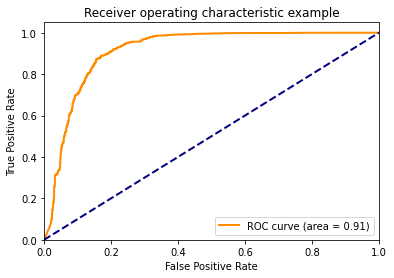

In [ ]:
plt.figure()
lw = 2

i = 3
plt.plot(fpr[i], tpr[i], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
fpr

{0: array([0.      , 0.      , 0.      , 0.      , ..., 0.977001, 0.977001, 0.981943, 1.      ]),
 1: array([0.      , 0.      , 0.      , 0.      , ..., 0.993402, 0.993402, 0.997293, 1.      ]),
 2: array([0.000000e+00, 0.000000e+00, 0.000000e+00, 1.680672e-04, ..., 9.714286e-01, 9.715966e-01, 9.724370e-01,
        1.000000e+00]),
 3: array([0.      , 0.018096, 0.018883, 0.018883, ..., 0.992132, 0.992919, 0.995279, 1.      ]),
 'micro': array([0.      , 0.00125 , 0.001305, 0.001305, ..., 0.991519, 0.991519, 0.993965, 1.      ])}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  """


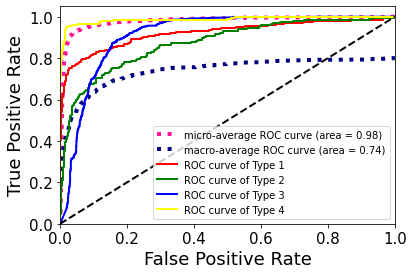

In [ ]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
#all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
all_fpr = np.unique(np.concatenate([fpr[0], fpr[1], fpr[2], fpr[3]]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
mean_tpr = interp(all_fpr, fpr[0], tpr[0]) + interp(all_fpr, fpr[1], tpr[1]) + interp(all_fpr, fpr[2], tpr[2]) + interp(all_fpr, fpr[3], tpr[3]) 
#for i in range(n_classes):
    #mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
n_c = 5
#mean_tpr /= n_classes
mean_tpr /= n_c

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red', 'green', 'blue','yellow','yellow'])

temp1 = fpr[3];temp2 = fpr[2];temp3 = tpr[3];temp4 = tpr[2]
temp5 = roc_auc[3];temp6 = roc_auc[2];fpr[3] = temp2; fpr[2] = temp1
tpr[3] = temp4; tpr[2] = temp3;roc_auc[3] = temp6; roc_auc[2] = temp5

for i, color in zip(range(n_classes), colors):
  if i != 10:
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of Type {0} '
             ''.format(i+1, roc_auc[i]))
##(area = {1:0.2f})

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.xticks(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
#plt.title('Receiver operating characteristic to multi-class classification')
plt.legend(loc="lower right")
plt.show()

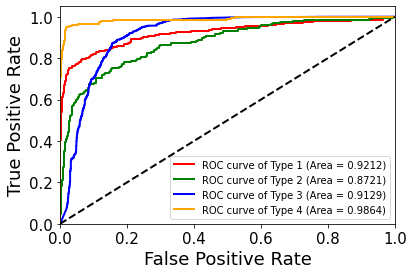

In [ ]:

plt.figure()


colors = cycle(['red', 'green', 'blue','orange'])
for i, color in zip(range(n_classes), colors):
  if i != 10:
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of Type {0} (Area = {1:0.4f})'
             ''.format(i+1, roc_auc[i]))
## 

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.xticks(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
#plt.title('Receiver operating characteristic to multi-class classification')
plt.legend(loc="lower right")
plt.show()